<a href="https://colab.research.google.com/github/Rodrigo-Lopes-de-Andrade/Artigos_e_Projetos/blob/main/Avalia%C3%A7%C3%A3o_de_Modelos_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Can we predict who will suffer a Heart Attack?


I will first perform **data exploration** to see if there are any variables that look to be indicative of heart disease.

Next, I will attempt to **predict** who will suffer a heart attack, and who will not.


I will also go in to **Model interpretability**. This is important in industry as many are still skeptical about 'black-box' models and are hesitant to trust what they do not understand. 

Let's go...

In [6]:
!pip install scikit-plot

In [10]:
# Importing libs
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from textwrap import wrap
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly as py
import plotly.graph_objs as go
import os
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import seaborn as sns
from imblearn.over_sampling import SMOTE
#import scikit-plot as skplt


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score


from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#ensembling
#from mlxtend.classifier import StackingCVClassifier

In [15]:
data = pd.read_csv('/content/heart.csv')


# Blank Data?

There are no blanks in our dataset

In [16]:
data.isnull().sum().sum()

0

No blanks in the data - we're good to go!

In [17]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Renaming columns for aesthetic purposes

In [18]:
# Renaming columns.
data.columns = ['Age', 'Sex', 'Chest Pain Type', 'Resting Blood Pressure', 'Cholesterol', 'Fasting Blood Sugar', 'Resting ECG', 'Max. HR Acheived',
       'Exercise Induced Angina', 'ST Depression', 'ST Slope', 'Num. Major Blood Vessels', 'Thalassemia', 'Condition']

**Important:** Features swapped

My research suggests that the features in this dataset are incorrectly labelled, therefore I will swicth them round.

In [19]:
# Swapped targets around as my reserach indicates that these have been labelled incorrectly

data['Condition'] = data['Condition'].apply(lambda x: 1 if x == 0 else 0)

Our conditions are fairly balanced, so we do not need to do any synthetic upsampling

In [20]:
data['Condition'].value_counts()

0    165
1    138
Name: Condition, dtype: int64

In [21]:
# Catergorical & Continuous split

# Ordinarily I'd use this function, however our categorical data is already in encoded form
# so today it is not applicable 

#categorical = [varibale for variable in df.columns if df[variable].dtype=='O']
# using 4 based on the df.nunique results above

categorical = data.loc[:,data.nunique()<=4]
continuous = data.loc[:,data.nunique()>4]

In [22]:
background_color = "#fafafa"
face_color = '#fafafa'


yes_c='#9b1b30'
no_c='#009473'
neut_c ='#112e51'

sub_col = '#a49a93'

# Data Exploration

Can we discover interesting features?

Can we start to understand what causes heart disease?

**Colors**

I will be using **red** for explicit positive cases, **green** for explicit no cases, and **gold** for neutral, ie. general overviews & observations

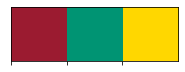

In [23]:
sns.palplot([yes_c,no_c,'gold'])

findfont: Font family ['sansserif'] not found. Falling back to DejaVu Sans.


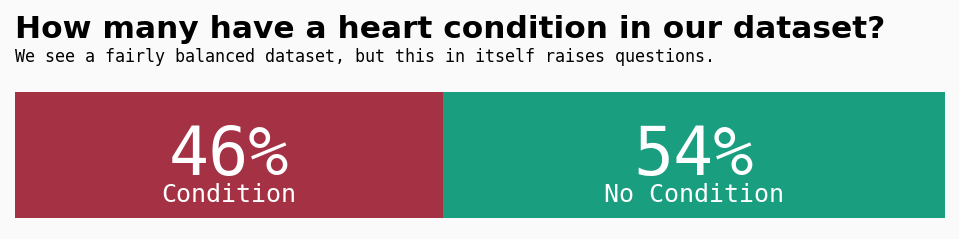

In [24]:
x=data.groupby(['Condition'])['Condition'].count()
y=len(data)
r=((x/y)).round(2)

ratio = pd.DataFrame(r).T

fig = plt.figure(figsize=(8, 10), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(5, 1)
gs.update(wspace=0.02, hspace=0.8)
ax = fig.add_subplot(gs[0, 0])



ax.set_facecolor(background_color)

ax.barh(ratio.index, ratio[1.0], color=yes_c, alpha=0.9, label='Condition')
ax.barh(ratio.index, ratio[0.0], left=ratio[1.0], color=no_c, alpha=0.9, label='No Condition')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
#ax.set_yticklabels(mf_ratio.index, fontfamily='serif', fontsize=11)


for i in ratio.index:
    ax.annotate(f"{int(ratio[1.0][i]*100)}%", 
                   xy=(ratio[1.0][i]/2, i),
                   va = 'center', ha='center',fontsize=32, fontweight='light', fontfamily='monospace',
                   color='white')

    ax.annotate("Condition", 
                   xy=(ratio[1.0][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='monospace',
                   color='white')
    
    
for i in ratio.index:
    ax.annotate(f"{int(ratio[0.0][i]*100)}%", 
                   xy=(ratio[1.0][i]+ratio[0.0][i]/2, i),
                   va = 'center', ha='center',fontsize=32, fontweight='light', fontfamily='monospace',
                   color='white')
    ax.annotate("No Condition", 
                   xy=(ratio[1.0][i]+ratio[0.0][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='monospace',
                   color='white')



# Title & Subtitle
ax.text(0,0.75,'How many have a heart condition in our dataset?',fontsize=15, fontweight='bold',fontfamily='sansserif')
ax.text(0,0.6,'We see a fairly balanced dataset, but this in itself raises questions.',fontsize=8,fontfamily='monospace')  

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
#ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))

# Removing legend due to labelled plot
ax.legend().set_visible(False)
plt.show()

The splits shown above does raise questions. 

On average, approx. 3% of people are affected by heart disease in the USA. Whereas here, it is verginf on 50%. That raises questions as to what population of people we are looking at - this is all important information in our 'data prediction story'

In [25]:
!pip install pywaffle

     |████████████████████████████████| 565 kB 21.1 MB/s 


findfont: Font family ['sanserif'] not found. Falling back to DejaVu Sans.


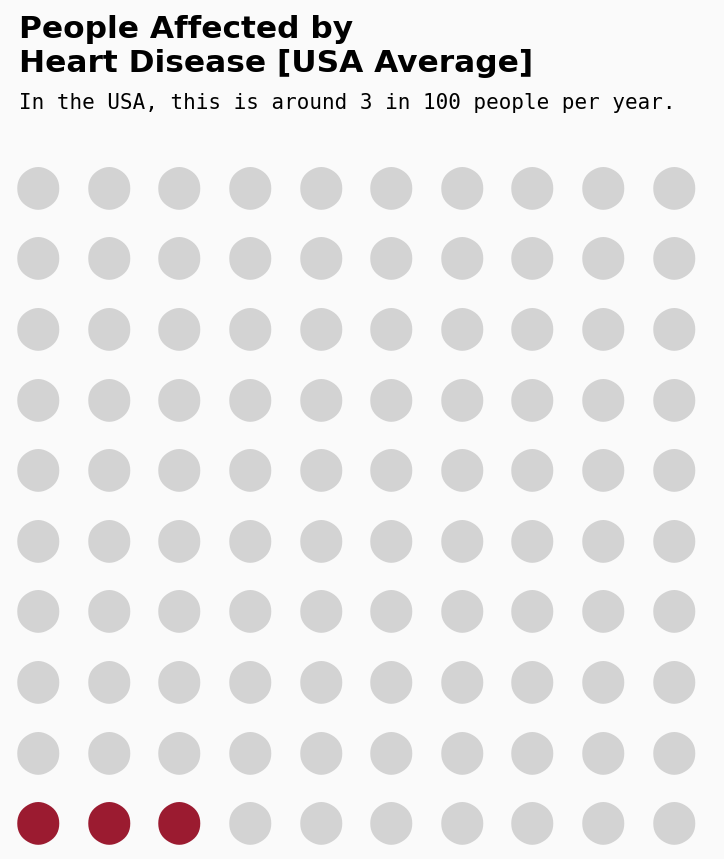

In [26]:


import matplotlib.pyplot as plt
from pywaffle import Waffle

fig = plt.figure(figsize=(5, 5),dpi=150,facecolor=background_color,
    FigureClass=Waffle,
    rows=10,
    values=[3, 97],
    colors=[yes_c, "lightgray"],
    characters='⬤',
    font_size=20,vertical=True,
)

fig.text(0.035,1.06,'People Affected by\nHeart Disease [USA Average]',fontfamily='sanserif',fontsize=15,fontweight='bold')
fig.text(0.035,1.01,'In the USA, this is around 3 in 100 people per year.',fontfamily='monospace',fontsize=10)

plt.show()

Comparing this against our dataset, we see a **huge** difference...

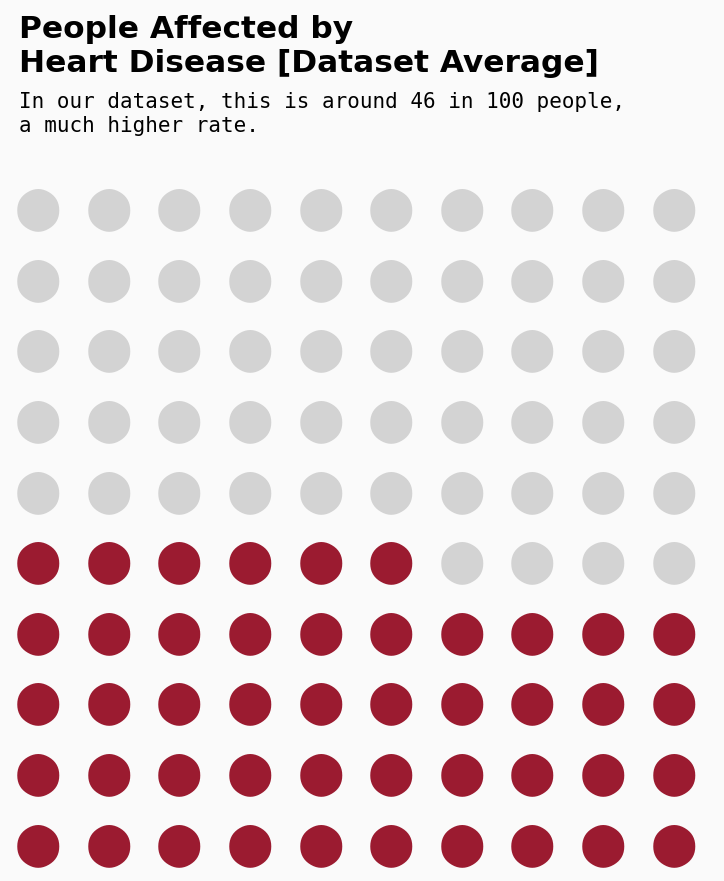

In [27]:
fig = plt.figure(figsize=(5, 5),dpi=150,facecolor=background_color,
    FigureClass=Waffle,
    rows=10,
    values=[46, 54],
    colors=[yes_c, "lightgray"],
    characters='⬤',
    font_size=20,vertical=True,
)

fig.text(0.035,1.09,'People Affected by\nHeart Disease [Dataset Average]',fontfamily='sanserif',fontsize=15,fontweight='bold')
fig.text(0.035,1.01,'In our dataset, this is around 46 in 100 people,\na much higher rate.',fontfamily='monospace',fontsize=10)

plt.show()

This isn't necessarily a problem, it's just something for us to be aware of.

# Let's view the data as a whole now

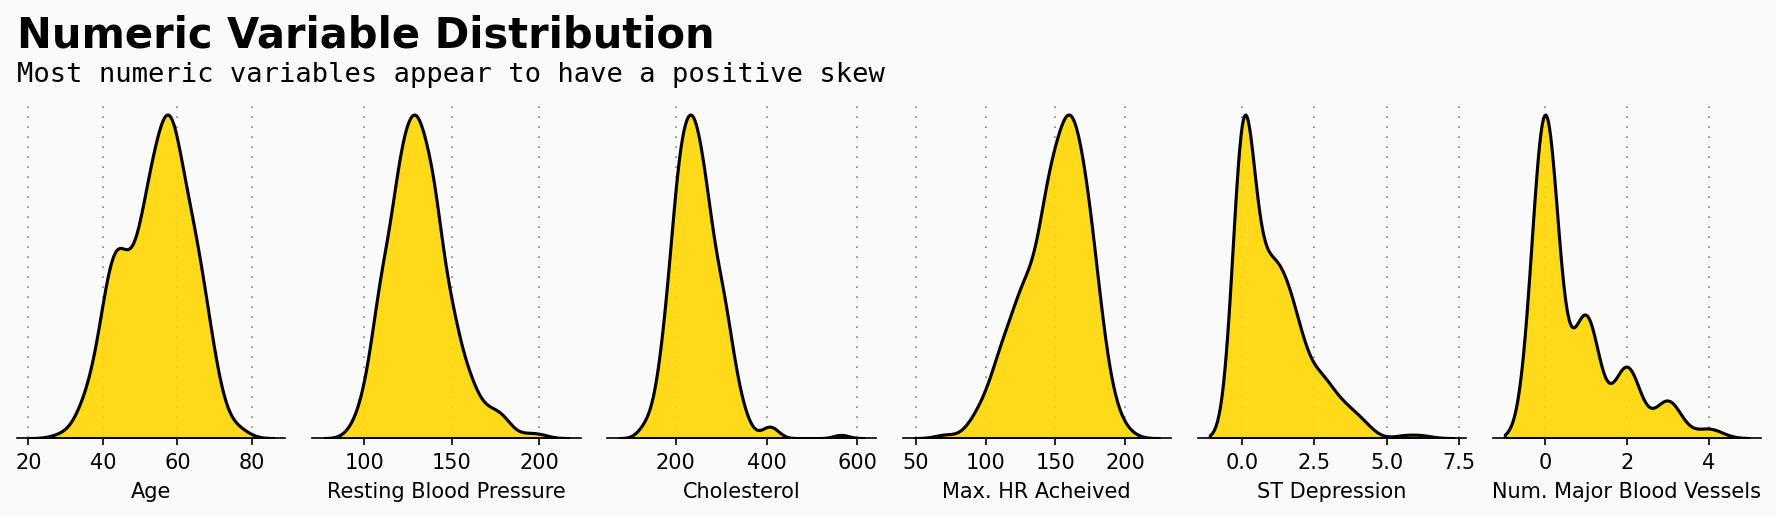

In [28]:
fig = plt.figure(figsize=(15, 3), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(1, 6)
gs.update(wspace=0.1, hspace=0.4)

# for plotting
df = data

run_no = 0
for row in range(0, 1):
    for col in range(0, 6):
        locals()["ax"+str(run_no)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(run_no)].set_facecolor(background_color)
        locals()["ax"+str(run_no)].tick_params(axis='y', left=False)
        locals()["ax"+str(run_no)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(run_no)].spines[s].set_visible(False)
        run_no += 1

run_no = 0
for variable in continuous:
        sns.kdeplot(df[variable] ,ax=locals()["ax"+str(run_no)], color='gold',ec='black', shade=True, linewidth=1.5, alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        locals()["ax"+str(run_no)].set_xlabel(variable)
        run_no += 1
        

Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()
ax0.text(Xstart, Yend+(Yend*0.15), 'Numeric Variable Distribution', fontsize=20, fontweight='bold', fontfamily='sans-serif')
ax0.text(Xstart, Yend+(Yend*0.05), 'Most numeric variables appear to have a positive skew', fontsize=13, fontweight='light', fontfamily='monospace')

plt.show()


We can also add in the condition to see if there is anything we can infer from each of the features.

For example, is Age important in determining risk of heart disease?

findfont: Font family ['sansserif'] not found. Falling back to DejaVu Sans.


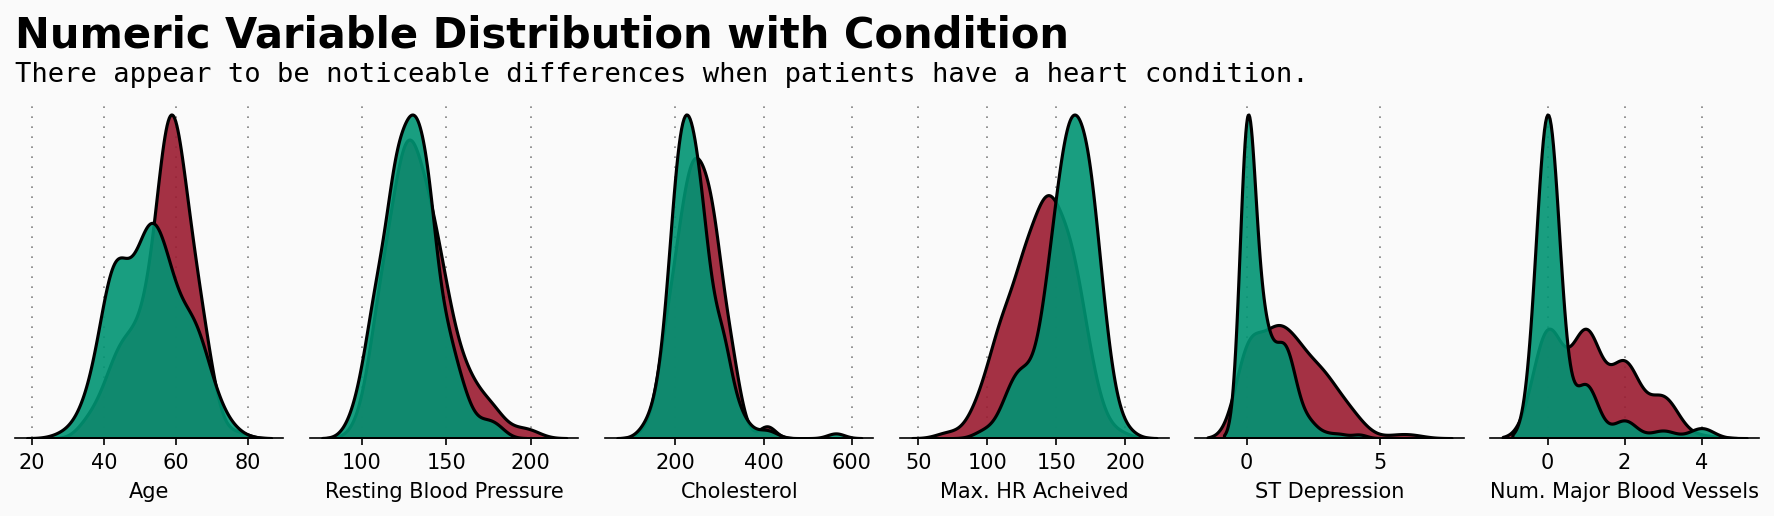

In [29]:

fig = plt.figure(figsize=(15, 3), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(1, 6)
gs.update(wspace=0.1, hspace=0.4)

# for plotting
df = data

run_no = 0
for row in range(0, 1):
    for col in range(0, 6):
        locals()["ax"+str(run_no)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(run_no)].set_facecolor(background_color)
        locals()["ax"+str(run_no)].tick_params(axis='y', left=False)
        locals()["ax"+str(run_no)].get_yaxis().set_visible(False)
        locals()["ax"+str(run_no)].set_axisbelow(True)
        for s in ["top","right","left"]:
            locals()["ax"+str(run_no)].spines[s].set_visible(False)
        run_no += 1

run_no = 0

Yes = df[df['Condition'] == 1]
No = df[df['Condition'] == 0]

for variable in continuous:
        sns.kdeplot(Yes[variable], ax=locals()["ax"+str(run_no)], color=yes_c,ec='black', shade=True, linewidth=1.5, alpha=0.9, zorder=3, legend=False)
        sns.kdeplot(No[variable],ax=locals()["ax"+str(run_no)], color=no_c, shade=True, ec='black',linewidth=1.5, alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        locals()["ax"+str(run_no)].set_xlabel(variable)
        run_no += 1
        
Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()
ax0.text(Xstart, Yend+(Yend*0.15), 'Numeric Variable Distribution with Condition', fontsize=20, fontweight='bold', fontfamily='sansserif')
ax0.text(Xstart, Yend+(Yend*0.05), 'There appear to be noticeable differences when patients have a heart condition.', fontsize=13, fontweight='light', fontfamily='monospace')

plt.show()

We do see some differences between conditions. In particularm Num. Major Blood Vessels, Age, & Max. HR Acheived look to be very important.

We can explore these more later as it does seems like this will be useful for our models.

First, I want to zoom in on two noticeable plots...

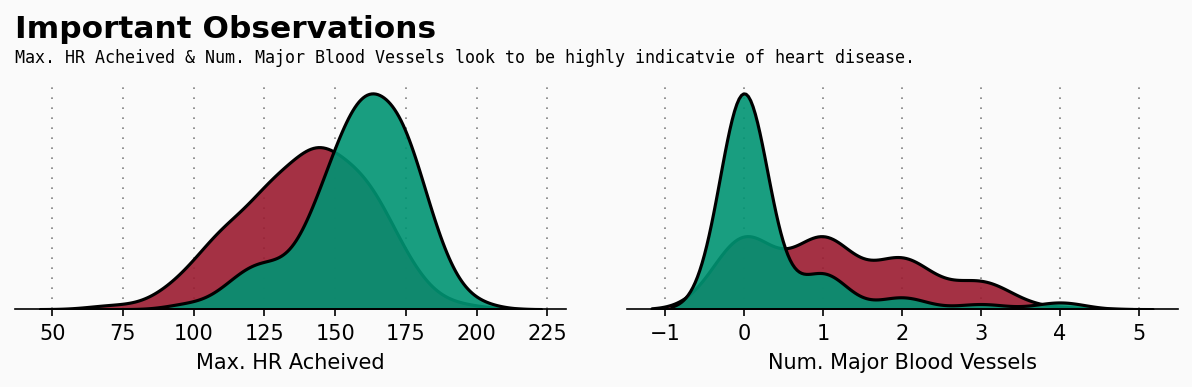

In [30]:
fig = plt.figure(figsize=(10, 5), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.11, hspace=0.5)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])


ax0.tick_params(axis='y', left=False)
ax0.get_yaxis().set_visible(False)
ax0.set_axisbelow(True)
ax1.tick_params(axis='y', left=False)
ax1.get_yaxis().set_visible(False)
ax1.set_axisbelow(True)
for s in ["top","right","left"]:
        ax0.spines[s].set_visible(False)
        ax1.spines[s].set_visible(False)

ax0.set_facecolor(face_color)
ax1.set_facecolor(face_color)


sns.kdeplot(Yes['Num. Major Blood Vessels'], ax=ax1, color=yes_c,ec='black', shade=True, linewidth=1.5, alpha=0.9, zorder=3, legend=False)
sns.kdeplot(No['Num. Major Blood Vessels'],ax=ax1, color=no_c, shade=True, ec='black',linewidth=1.5, alpha=0.9, zorder=3, legend=False)
 
sns.kdeplot(Yes['Max. HR Acheived'], ax=ax0, color=yes_c,ec='black', shade=True, linewidth=1.5, alpha=0.9, zorder=3, legend=False)
sns.kdeplot(No['Max. HR Acheived'],ax=ax0, color=no_c, shade=True, ec='black',linewidth=1.5, alpha=0.9, zorder=3, legend=False)


ax0.grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
ax1.grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))


Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()
ax0.text(Xstart, Yend+(Yend*0.2), 'Important Observations', fontsize=15, fontweight='bold', fontfamily='sansserif')
ax0.text(Xstart, Yend+(Yend*0.09), 'Max. HR Acheived & Num. Major Blood Vessels look to be highly indicatvie of heart disease.', fontsize=8, fontweight='light', fontfamily='monospace')

plt.show()    

It looks like these two variables have a strong imapct. 

They will likely become important features for our model later on.

# Categorical variables

Now I will explore categorical variables.

First, I will view overall counts, then I will split by condition as I did with the continuous variables

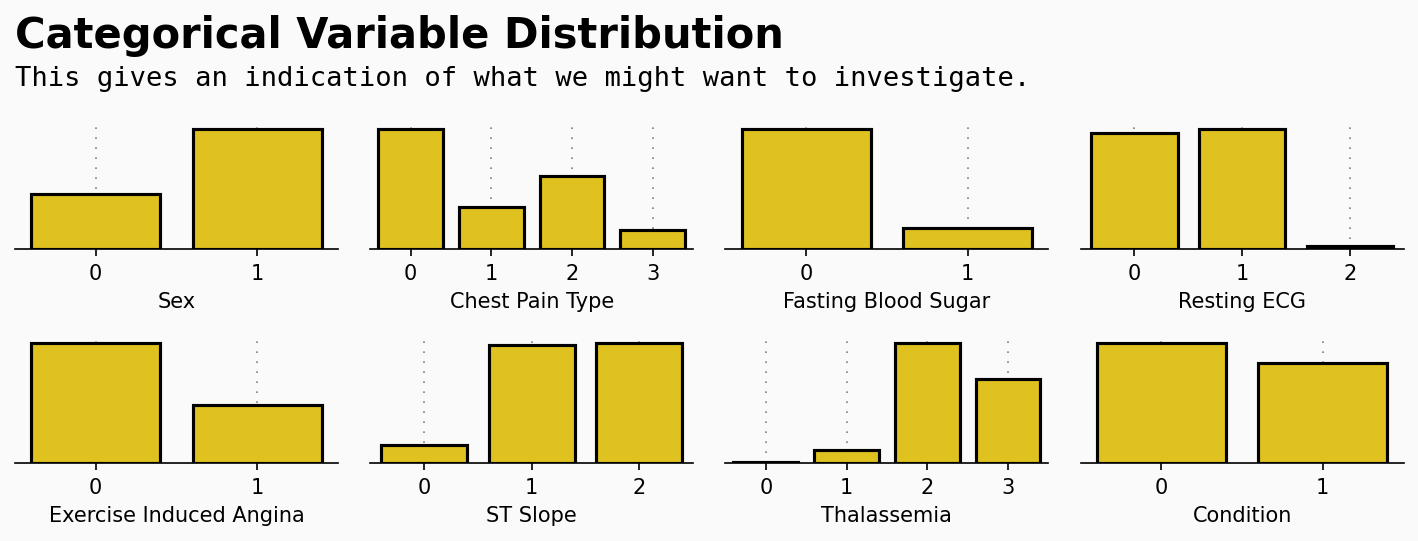

In [31]:
fig = plt.figure(figsize=(15, 3), dpi=150, facecolor=background_color)
gs = fig.add_gridspec(2, 5)
gs.update(wspace=0.1, hspace=0.7)


run_no = 0
for row in range(0, 2):
    for col in range(0, 4):
        locals()["ax"+str(run_no)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(run_no)].set_facecolor(background_color)
        locals()["ax"+str(run_no)].tick_params(axis='y', left=False)
        locals()["ax"+str(run_no)].get_yaxis().set_visible(False)
        locals()["ax"+str(run_no)].set_axisbelow(True)
        for s in ["top","right","left"]:
            locals()["ax"+str(run_no)].spines[s].set_visible(False)
        run_no += 1

run_no = 0
for variable in categorical:
        sns.countplot(df[variable],data=df,ax=locals()["ax"+str(run_no)], color='gold',ec='black', linewidth=1.5, alpha=1,)
        locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        locals()["ax"+str(run_no)].set_xlabel(variable)
        run_no += 1


Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()
ax0.text(Xstart, Yend+(Yend*0.6), 'Categorical Variable Distribution', fontsize=20, fontweight='bold', fontfamily='sans-serif')
ax0.text(Xstart, Yend+(Yend*0.3), 'This gives an indication of what we might want to investigate.', fontsize=13, fontweight='light', fontfamily='monospace')


plt.show()


So above we see how common or uncommon certain categories are.

For example, category 2 of Resting ECG is very uncommon.

But how does the Condition variable present it self with respect to each of these features? Can we learn anything?

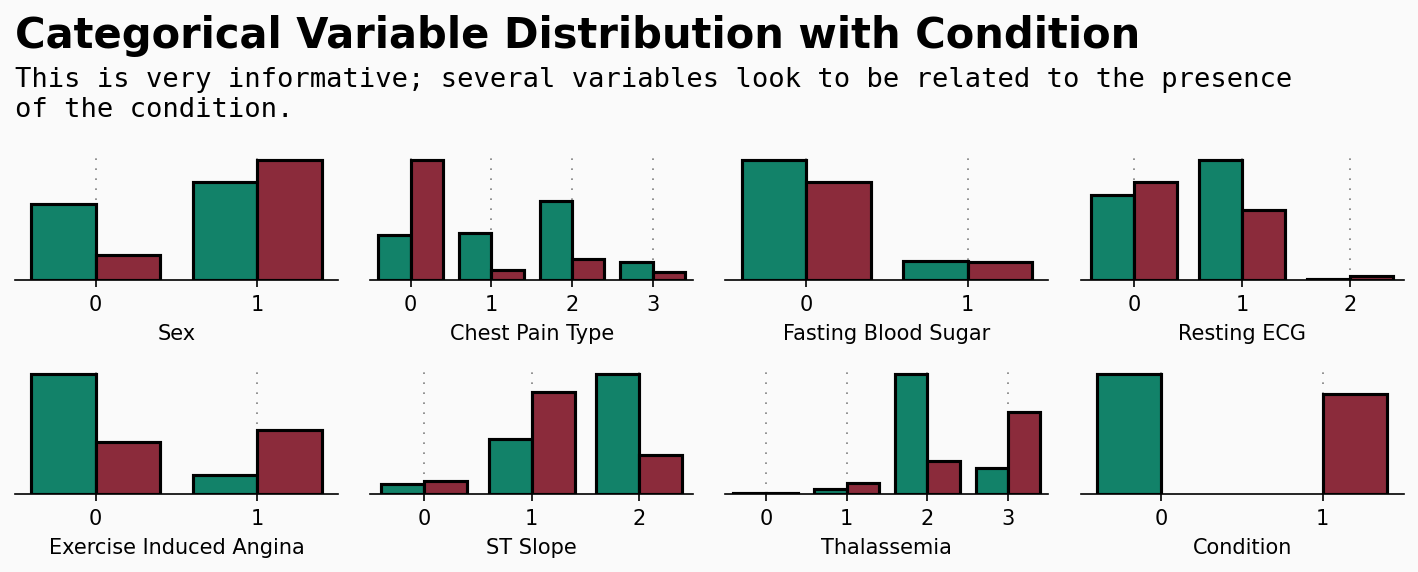

In [32]:
fig = plt.figure(figsize=(15, 3), dpi=150, facecolor=background_color)
gs = fig.add_gridspec(2, 5)
gs.update(wspace=0.1, hspace=0.7)


run_no = 0
for row in range(0, 2):
    for col in range(0, 4):
        locals()["ax"+str(run_no)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(run_no)].set_facecolor(background_color)
        locals()["ax"+str(run_no)].tick_params(axis='y', left=False)
        locals()["ax"+str(run_no)].get_yaxis().set_visible(False)
        locals()["ax"+str(run_no)].set_axisbelow(True)
        for s in ["top","right","left"]:
            locals()["ax"+str(run_no)].spines[s].set_visible(False)
        run_no += 1

run_no = 0
for variable in categorical:
        sns.countplot(df[variable],data=df,ax=locals()["ax"+str(run_no)],hue='Condition',palette=[no_c,yes_c],ec='black', linewidth=1.5, alpha=1)
        locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        locals()["ax"+str(run_no)].set_xlabel(variable)
        locals()["ax"+str(run_no)].get_legend().remove()
        run_no += 1


Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()
ax0.text(Xstart, Yend+(Yend*0.85), 'Categorical Variable Distribution with Condition', fontsize=20, fontweight='bold', fontfamily='sans-serif')
ax0.text(Xstart, Yend+(Yend*0.3), 'This is very informative; several variables look to be related to the presence\nof the condition.', fontsize=13, fontweight='light', fontfamily='monospace')


plt.show()


again, let's now zoom in to a couple of standout observations...

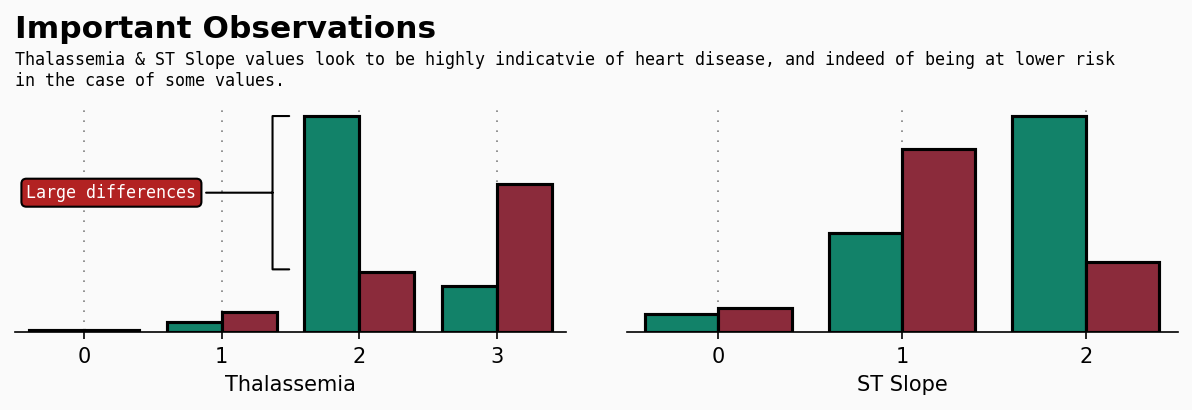

In [33]:
fig = plt.figure(figsize=(10, 5), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.11, hspace=0.5)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])


ax0.tick_params(axis='y', left=False)
ax0.get_yaxis().set_visible(False)
ax0.set_axisbelow(True)
ax1.tick_params(axis='y', left=False)
ax1.get_yaxis().set_visible(False)
ax1.set_axisbelow(True)
for s in ["top","right","left"]:
        ax0.spines[s].set_visible(False)
        ax1.spines[s].set_visible(False)

ax0.set_facecolor(face_color)
ax1.set_facecolor(face_color)


sns.countplot(df['Thalassemia'], hue=df['Condition'],palette=[no_c,yes_c], ax=ax0, color=yes_c,ec='black', linewidth=1.5, alpha=1)
 
sns.countplot(df['ST Slope'], hue=df['Condition'],palette=[no_c,yes_c], ax=ax1, color=yes_c,ec='black', linewidth=1.5, alpha=1)


ax0.grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
ax1.grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))


Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()
ax0.text(Xstart, Yend+(Yend*0.3), 'Important Observations', fontsize=15, fontweight='bold', fontfamily='sansserif')
ax0.text(Xstart, Yend+(Yend*0.09), 'Thalassemia & ST Slope values look to be highly indicatvie of heart disease, and indeed of being at lower risk\nin the case of some values.', fontsize=8, fontweight='light', fontfamily='monospace')

ax0.get_legend().remove()
ax1.get_legend().remove()

ax0.annotate('Large differences', xy=(1.4, 84), xytext=(0.2, 84), xycoords='data', 
            fontsize=8, ha='center', va='center',fontfamily='monospace',
            bbox=dict(boxstyle='round', fc='firebrick'),
            arrowprops=dict(arrowstyle='-[, widthB=4.6, lengthB=1', lw=1, color='black'), color='white')


plt.show()     


This is the power of data visualization, we have been able to tease out important variables and begin to understand **potential** causes of heart disease.


# How does risk vary when our variables change?

The below is a really valuable way of seeing **how risk changes with our variables**, and if there are any inflection points of change.


AttributeError: ignored

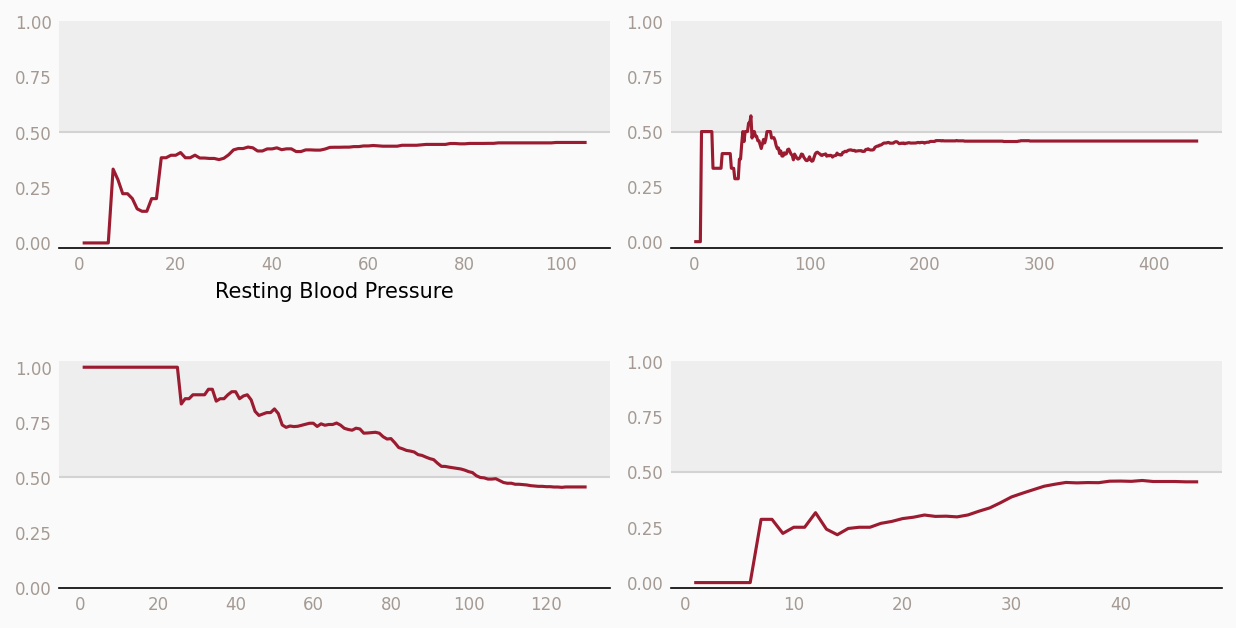

In [34]:

fig = plt.figure(figsize=(10, 5), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.11, hspace=0.5)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])


ax0.set_facecolor(face_color)
ax1.set_facecolor(face_color)
ax2.set_facecolor(face_color)
ax3.set_facecolor(face_color)


cummulate_survival_ratio = []

for i in range(data['Resting Blood Pressure'].min(), data['Resting Blood Pressure'].max()):
    cummulate_survival_ratio.append(data[data['Resting Blood Pressure'] < i]['Condition'].sum() / len(data[data['Resting Blood Pressure'] < i]['Condition']))

sns.lineplot(data=cummulate_survival_ratio,color=yes_c,ax=ax0)


import matplotlib.patches as patches
    
Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()



# Create a Rectangle patch
rect = patches.Rectangle((Xstart-1, 0.5),Xend+100, Yend+10, linewidth=1,
                         edgecolor='lightgray', facecolor="#eeeeee")
  
# Add the patch to the Axes
ax0.add_patch(rect)




#ax0.text(Xstart,Yend+(Yend*0.1),'Resting Blood Pressure',fontfamily='serif',color='black',fontsize=10)

###################

cummulate_survival_ratio = []

for i in range(data['Cholesterol'].min(), data['Cholesterol'].max()):
    cummulate_survival_ratio.append(data[data['Cholesterol'] < i]['Condition'].sum() / len(data[data['Cholesterol'] < i]['Condition']))

sns.lineplot(data=cummulate_survival_ratio,color=yes_c,ax=ax1)

Xstart, Xend = ax1.get_xlim()
Ystart, Yend = ax1.get_ylim()

# Create a Rectangle patch
rect = patches.Rectangle((Xstart-1, 0.5),Xend+100, Yend, linewidth=1,
                         edgecolor='lightgray', facecolor="#eeeeee")
  
# Add the patch to the Axes
ax1.add_patch(rect)


#ax1.text(Xstart,Yend+(Yend*0.1),'Cholesterol',fontfamily='serif',color='black',fontsize=10)

###################


cummulate_survival_ratio = []

for i in range(data['Max. HR Acheived'].min(), data['Max. HR Acheived'].max()):
    cummulate_survival_ratio.append(data[data['Max. HR Acheived'] < i]['Condition'].sum() / len(data[data['Max. HR Acheived'] < i]['Condition']))

sns.lineplot(data=cummulate_survival_ratio,color=yes_c,ax=ax2)

Xstart, Xend = ax2.get_xlim()
Ystart, Yend = ax2.get_ylim()

# Create a Rectangle patch
rect = patches.Rectangle((Xstart-1, 0.5),Xend+100, Yend, linewidth=1,
                         edgecolor='lightgray', facecolor="#eeeeee")
  
# Add the patch to the Axes
ax2.add_patch(rect)

#ax2.text(Xstart,1.1,'Max. HR Acheived',fontfamily='serif',color='black',fontsize=10)


###################


cummulate_survival_ratio = []

for i in range(data['Age'].min(), data['Age'].max()):
    cummulate_survival_ratio.append(data[data['Age'] < i]['Condition'].sum() / len(data[data['Age'] < i]['Condition']))

sns.lineplot(data=cummulate_survival_ratio,color=yes_c,ax=ax3)

Xstart, Xend = ax3.get_xlim()
Ystart, Yend = ax3.get_ylim()

# Create a Rectangle patch
rect = patches.Rectangle((Xstart-1, 0.5),Xend+100, Yend+10, linewidth=1,
                         edgecolor='lightgray', facecolor="#eeeeee")
  
# Add the patch to the Axes
ax3.add_patch(rect)

#ax3.text(Xstart,Yend+(Yend*0.1),'Age',fontfamily='serif',color='black',fontsize=10)

###################


for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    

ax0.set_yticks(np.arange(0, 1.25, 0.25))
ax1.set_yticks(np.arange(0, 1.25, 0.25))
ax2.set_yticks(np.arange(0, 1.25, 0.25))
ax3.set_yticks(np.arange(0, 1.25, 0.25))

ax0.tick_params(axis='both', which='major', labelsize=8)
ax0.tick_params(axis='both', colors=sub_col)
ax0.tick_params(axis=u'both', which=u'both',length=0)

ax1.tick_params(axis='both', which='major', labelsize=8)
ax1.tick_params(axis='both', colors=sub_col)
ax1.tick_params(axis=u'both', which=u'both',length=0)

ax2.tick_params(axis='both', which='major', labelsize=8)
ax2.tick_params(axis='both', colors=sub_col)
ax2.tick_params(axis=u'both', which=u'both',length=0)

ax3.tick_params(axis='both', which='major', labelsize=8)
ax3.tick_params(axis='both', colors=sub_col)
ax3.tick_params(axis=u'both', which=u'both',length=0)




###############
ax0.set_xlabel("Resting Blood Pressure",loc='left',fontsize=10,fontfamily='sans-serif')
ax1.set_xlabel("Cholesterol",loc='left',fontsize=10,fontfamily='sans-serif')
ax2.set_xlabel("Max. HR Acheived",loc='left',fontsize=10,fontfamily='sans-serif')
ax3.set_xlabel("Age",loc='left',fontsize=10,fontfamily='sans-serif')



#ax2.set_ylabel(" ",loc='top',fontsize=sub,color=sub_col)

#title
ax0.text(Xstart,1.4,'How does risk vary by each variable as it changes?',fontfamily='sans-serif',color='black',fontweight='bold',fontsize=15)
ax0.text(Xstart,1.25,
'''
The grey box denotes where risk is greater than 50%.'''
         
,fontfamily='monospace',fontsize=8)

ax1.set_yticklabels([])
ax3.set_yticklabels([])

plt.show()

# Observations

So far we have established a few important points.

1 - As resting blood pressure increasres, so to does risk of heart disease

2 - Rising Choloseterol does not appear to be a major indicator

3 - A low Max HR acheived is a big warning sign. 

4 - Risk of heart disease increases with age

Can we build a feature that incorporates these observations?


Let's also look how these important variables interact with eachother

AttributeError: ignored

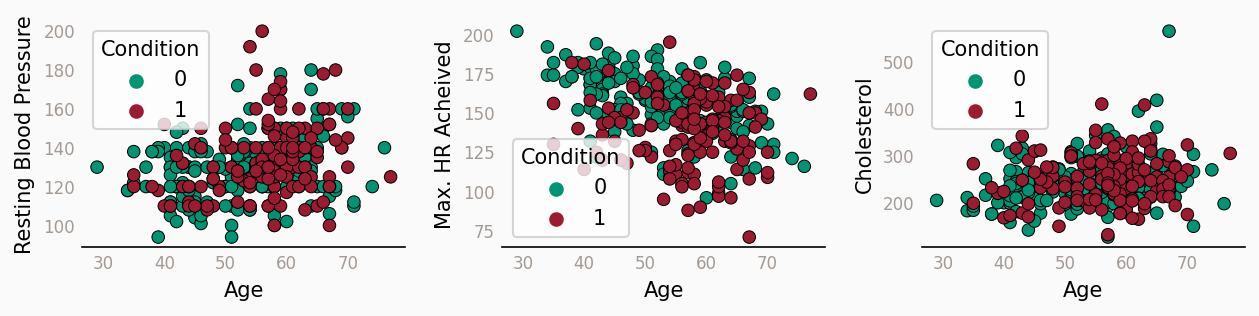

In [35]:

fig = plt.figure(figsize=(10, 5), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(2, 3)
gs.update(wspace=0.3, hspace=0.5)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])



ax0.set_facecolor(face_color)
ax1.set_facecolor(face_color)
ax2.set_facecolor(face_color)


sns.scatterplot(data=data,x=data['Age'],y=data['Resting Blood Pressure'],hue=data['Condition'],ec='black',ax=ax0,palette=[no_c,yes_c])
sns.scatterplot(data=data,x=data['Age'],y=data['Max. HR Acheived'],hue=data['Condition'],ec='black',ax=ax1,palette=[no_c,yes_c])
sns.scatterplot(data=data,x=data['Age'],y=data['Cholesterol'],hue=data['Condition'],ec='black',ax=ax2,palette=[no_c,yes_c])


ax0.tick_params(axis='both', which='major', labelsize=8)
ax0.tick_params(axis='both', colors=sub_col)
ax0.tick_params(axis=u'both', which=u'both',length=0)

ax1.tick_params(axis='both', which='major', labelsize=8)
ax1.tick_params(axis='both', colors=sub_col)
ax1.tick_params(axis=u'both', which=u'both',length=0)

ax2.tick_params(axis='both', which='major', labelsize=8)
ax2.tick_params(axis='both', colors=sub_col)
ax2.tick_params(axis=u'both', which=u'both',length=0)





for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)

    
###############
ax0.set_xlabel("Age",loc='left',fontsize=10,color=sub_col)
ax1.set_xlabel("",loc='left',fontsize=10,color=sub_col)
ax2.set_xlabel("",loc='left',fontsize=10,color=sub_col)

ax0.set_ylabel("Rest. BP.",loc='top',fontsize=10,color=sub_col)
ax1.set_ylabel("Max. HR.",loc='top',fontsize=10,color=sub_col)
ax2.set_ylabel("Chol.",loc='top',fontsize=10,color=sub_col)


ax0.text(20,254,'How do the variables interact?',fontsize=15,fontfamily='sansserif',fontweight='bold')
ax0.text(20,237.5,'The strongest relationship appears to be between Age & Max HR.',fontsize=10,fontfamily='monospace')

ax0.get_legend().remove()
ax1.get_legend().remove()
ax2.get_legend().remove()

ax0.text(20,220,'Heart Disease',fontsize=8,fontfamily='sansserif',color=yes_c)
ax0.text(40,220,'|',fontsize=8,fontfamily='serif')
ax0.text(41.5,220,'No Heart Disease',fontsize=8,fontfamily='sansserif',color=no_c)

plt.show()

# What about Gender?

Are there risk differences between the genders?

We aren't told in the dataset if Male is 1 or 0, so I will leave the data as 1 or 0. 

In [36]:
# Function from Subin An 
# https://www.kaggle.com/subinium/tps-apr-highlighting-the-data

def age_band(num):
    for i in range(1, 100):
        if num < 10*i :  return f'{(i-1) * 10} ~ {i*10}'

data['Age band'] = data['Age'].apply(age_band)
hr_age = data[['Age band', 'Condition','Sex']].groupby('Age band')['Condition'].value_counts().sort_index().unstack().fillna(0)
hr_age['Condition rate'] = hr_age[1] / (hr_age[0] + hr_age[1]) * 100
age_band = data['Age band'].value_counts().sort_index()


AttributeError: ignored

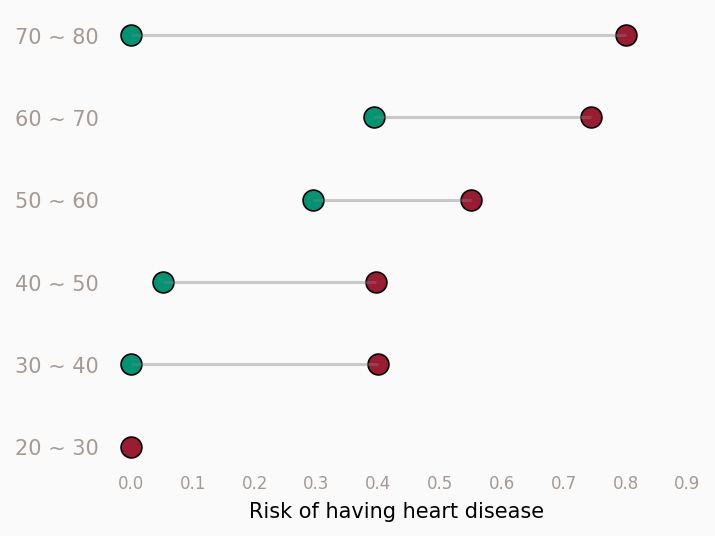

In [37]:
age_sex_surv = data.groupby(['Sex','Age band'])['Condition'].mean().unstack().T
fem_mean = age_sex_surv[0].mean()
male_mean = age_sex_surv[1].mean()

fig = plt.figure(figsize=(5, 4), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.2, hspace=0.8)
ax0 = fig.add_subplot(gs[0, 0])

ax0.set_facecolor(face_color)

for s in ["right", "top","bottom","left"]:
    ax0.spines[s].set_visible(False)

my_range=range(1,len(age_sex_surv.index)+1)
 
ax0.hlines(y=my_range, xmin=age_sex_surv[1], xmax=age_sex_surv[0], color='gray', alpha=0.4)
sns.scatterplot(age_sex_surv[1], my_range, color=yes_c, ec='black',alpha=1,s=100, label='male',ax=ax0)

sns.scatterplot(age_sex_surv[0], my_range, color=no_c,ec='black', alpha=1,s=100, label='female',ax=ax0)
ax0.get_legend().remove()

Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()
ax0.set_xticks(np.arange(0, 1, 0.1))
ax0.set_yticklabels([' ','20 ~ 30', '30 ~ 40', '40 ~ 50', '50 ~ 60','60 ~ 70', '70 ~ 80', '80 ~ 90'])


ax0.tick_params(axis='x', which='major', labelsize=8)
ax0.tick_params(axis='both', colors=sub_col)
ax0.tick_params(axis=u'both', which=u'both',length=0)

ax0.set_xlabel("Risk of having heart disease",loc='left',fontsize=8,color=sub_col)


ax0.text(-0.04,7.6,'Condition rates by age & sex',fontsize=15,fontweight='bold',color='black',fontfamily='sansserif')
ax0.text(-0.04,6.7,'The sex is not specified in the data, but it looks to be \nan important factor, with red being higher risk in all \ncategories and a higher mean risk.',fontsize=10,fontfamily='monospace')

#ax0.text(0,7,'Male',fontsize=8,fontweight='bold',color=yes_c,fontfamily='serif')
#ax0.text(0+0.037,7,'|',fontsize=8,fontweight='bold',color='black',fontfamily='serif')
#ax0.text(0+0.0436,7,'Female',fontsize=8,fontweight='bold',color=no_c,fontfamily='serif')

ax0.axvline(male_mean ,color=yes_c, linewidth=0.4, linestyle='dashdot')
ax0.axvline(fem_mean ,color=no_c, linewidth=0.4, linestyle='dashdot')


# Show the graph
plt.show()

For the purposes of this project, and using some background research, let's assume the red category is Male.


In [38]:
data.groupby(['Sex'])['Condition'].mean()

Sex
0    0.250000
1    0.550725
Name: Condition, dtype: float64

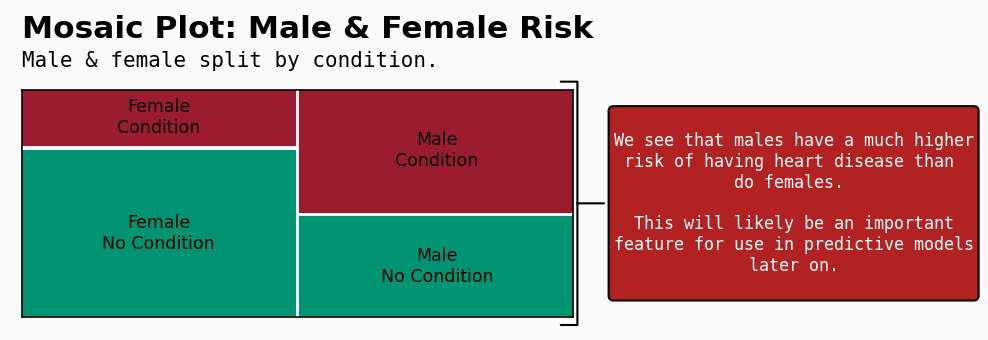

In [39]:
from statsmodels.graphics.mosaicplot import mosaic

fig = plt.figure(figsize=(10, 5), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.11, hspace=0.5)
ax0 = fig.add_subplot(gs[0, 0])

ax0.set_facecolor(face_color)

props = lambda key: {'color': yes_c if 'Condition' in key else  no_c}

gap = [0.01,0.025]

data_mos = {('Female', 'No Condition'): 0.75, ('Female', 'Condition'): 0.25, ('Male', 'No Condition'): 0.45, ('Male', 'Condition'): 0.55}
mosaic(data_mos, gap=gap,properties=props,axes_label=False,ax=ax0)


ax0.text(0,1.23,'Mosaic Plot: Male & Female Risk',fontsize=15, fontweight='bold',fontfamily='sansserif',color='black')
ax0.text(0,1.1,'Male & female split by condition.',fontsize=10, fontfamily='monospace')

ax0.annotate('''
We see that males have a much higher
risk of having heart disease than 
do females. 

This will likely be an important
feature for use in predictive models
later on.
''', xy=(1, 0.5), xytext=(1.4, 0.5), xycoords='data', 
            fontsize=8, ha='center', va='center',fontfamily='monospace',
            bbox=dict(boxstyle='round', fc='firebrick'),
            arrowprops=dict(arrowstyle='-[, widthB=7.3, lengthB=1', lw=1, color='black'), color='white')



plt.show()



# Next steps

we can now use our new-found understanding to start to build a model that will seek to predict who will suffer from heart disease, and who will not...

# Feature Engineering

I want to build some features that might help our model.

I'll use the median values to help with this

In [40]:
print('Median Values:')
for i in continuous:
    print(i,data[i].median())

Median Values:
Age 55.0
Resting Blood Pressure 130.0
Cholesterol 240.0
Max. HR Acheived 153.0
ST Depression 0.8
Num. Major Blood Vessels 0.0


In [41]:
data['Age_gr_med'] = data['Age'].apply(lambda x: 1 if x > data['Age'].median() else 0)
data['mhr_lr_med'] = data['Max. HR Acheived'].apply(lambda x: 1 if x < data['Max. HR Acheived'].median() else 0)


data['Age_MaxHR'] = data['Age_gr_med'] + data['mhr_lr_med']
data['Age_MaxHR_dum'] = data['Age_MaxHR'].apply(lambda x: 1 if x == 2 else 0)

In [42]:
data.drop('Age_MaxHR',inplace=True, axis=1)

# Modelling

In [44]:
# model libs


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score


from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#ensembling
#from mlxtend.classifier import StackingCVClassifier

In [45]:
# spltting the data

X = data[['Age', 'Sex', 'Chest Pain Type', 'Resting Blood Pressure',
       'Cholesterol', 'Fasting Blood Sugar', 'Resting ECG', 'Max. HR Acheived',
       'Exercise Induced Angina', 'ST Depression', 'ST Slope',
       'Num. Major Blood Vessels', 'Thalassemia']]

# I haven't used the new fetures as they actually make the  xgb model perform worse! THough they do improve RF & Log Reg

y = data['Condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)


In [46]:
# Log Reg

lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[30  4]
 [ 5 22]]


Accuracy of Logistic Regression: 85.24590163934425 

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        34
           1       0.85      0.81      0.83        27

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



Great results so far.

If we change the threshold used for the logistic regression model does that help?

In [47]:
#source code: https://www.kaggle.com/prashant111/extensive-analysis-eda-fe-modelling
# modified

from sklearn.preprocessing import binarize

for i in range(1,8):
    
    cm1=0
    y_pred1 = lr.predict_proba(X_test)[:,1]
    y_pred1 = y_pred1.reshape(-1,1)
    y_pred2 = binarize(y_pred1, i/10)
    y_pred2 = np.where(y_pred2 == 1, 1, 0)
    cm1 = confusion_matrix(y_test, y_pred2)
        
    print ('With',i/10,'threshold the Confusion Matrix is ','\n\n',cm1,'\n\n',
            'with',cm1[0,0]+cm1[1,1],'correct predictions, ', '\n\n', 
           
            cm1[0,1],'Type I errors( False Positives), ','\n\n',
           
            cm1[1,0],'Type II errors( False Negatives), ','\n\n',
           
           'Accuracy score: ', (accuracy_score(y_test, y_pred2)), '\n\n',
          
            '====================================================', '\n\n')

TypeError: ignored

no, it appears that the standard 0.5 thereshold is optimal

In [48]:
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=7)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confusion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confusion matrix
[[30  4]
 [ 6 21]]


Accuracy of Random Forest: 83.60655737704919 

              precision    recall  f1-score   support

           0       0.83      0.88      0.86        34
           1       0.84      0.78      0.81        27

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [49]:
from sklearn.model_selection import GridSearchCV

n_estimators =[64,100,128,200]
max_features = [2,3,5,7]
bootstrap = [True,False]

param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap}

In [ ]:
#rf = RandomForestClassifier()

#grid = GridSearchCV(rf,param_grid)

#grid.fit(X_train,y_train)

In [ ]:
#grid.best_params_

#{'bootstrap': True, 'max_features': 2, 'n_estimators': 200}

In [50]:
# Let's use those params now

rfc = RandomForestClassifier(max_features=2,n_estimators=200,bootstrap=True)

rfc.fit(X_train,y_train)

rfc_tuned_pred = rfc.predict(X_test)

In [51]:

rf_conf_matrix = confusion_matrix(y_test, rfc_tuned_pred)
rf_acc_score = accuracy_score(y_test, rfc_tuned_pred)
print("confusion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rfc_tuned_pred))

confusion matrix
[[30  4]
 [ 6 21]]


Accuracy of Random Forest: 83.60655737704919 

              precision    recall  f1-score   support

           0       0.83      0.88      0.86        34
           1       0.84      0.78      0.81        27

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [52]:
xgb = XGBClassifier(learning_rate=0.1, n_estimators=64, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confusion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

confusion matrix
[[31  3]
 [ 3 24]]


Accuracy of Extreme Gradient Boost: 90.1639344262295 

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        34
           1       0.89      0.89      0.89        27

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [53]:
# Model stacking

scv=StackingCVClassifier(classifiers=[xgb,rf,lr],meta_classifier= xgb,random_state=42)
scv.fit(X_train,y_train)
scv_predicted = scv.predict(X_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))

NameError: ignored

The stacking classifier didn't help in this case.

Let's bring the models together and see how they performed

AttributeError: ignored

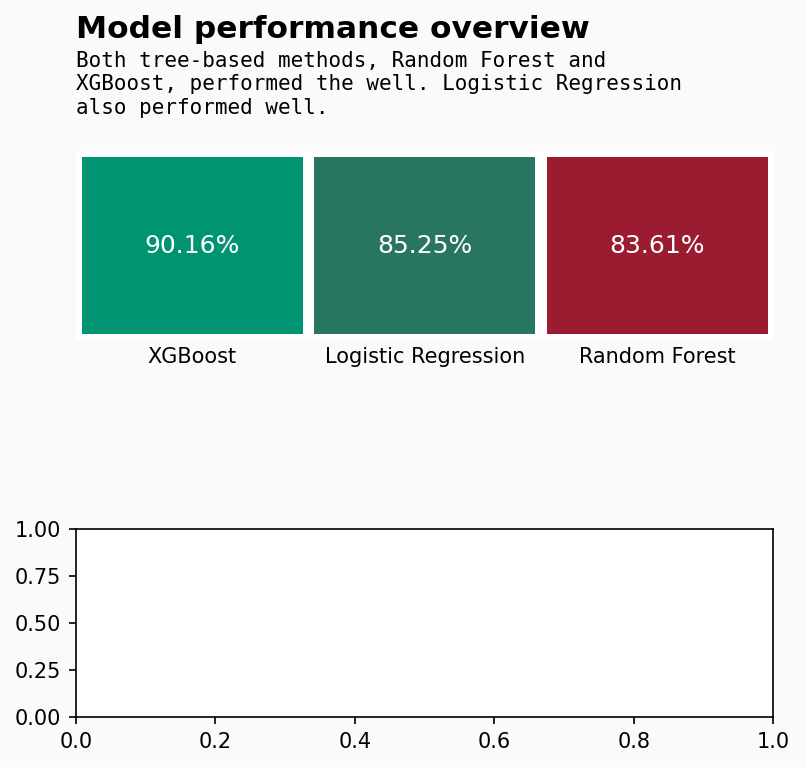

In [54]:
model_eval = pd.DataFrame({'Model': ['Logistic Regression','Random Forest','XGBoost'], 'Accuracy': [lr_acc_score,rf_acc_score,xgb_acc_score]})

model_eval = model_eval.set_index('Model').sort_values(by='Accuracy',ascending=False).T


cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", [yes_c,no_c,no_c,no_c])


fig = plt.figure(figsize=(6, 5), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(2, 1)
gs.update(wspace=0.5, hspace=1)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])


sns.heatmap(model_eval, cmap=cmap,annot=True,fmt=".2%",yticklabels=False, linewidths=5,cbar=False,ax=ax0,annot_kws={"fontsize":12})
ax0.tick_params(axis=u'both', which=u'both',length=0)

ax0.tick_params(axis='both')
ax0.tick_params(axis=u'both', which=u'both',length=0)
ax0.set_ylabel('') 

ax0.text(0,-0.6,'Model performance overview',fontsize=15,fontweight='bold',color='black',fontfamily='sansserif')
ax0.text(0,-0.2,'Both tree-based methods, Random Forest and\nXGBoost, performed the well. Logistic Regression\nalso performed well.',fontsize=10,fontfamily='monospace')
ax0.set_xlabel("",loc='left',fontsize=8,color=sub_col)

sns.heatmap(xgb_conf_matrix, linewidths=2.5,yticklabels=['Actual No-Condition','Actual Condition'],xticklabels=['Predicted No-Condition','Predicted Condition'], cmap=cmap, cbar=None,annot=True,fmt='d',ax=ax1,annot_kws={"fontsize":15})

ax1.text(0,-0.5,'XGB performance overview',fontsize=15,fontweight='bold',color='black',fontfamily='sansserif')
ax1.text(0,-0.2,'The model performs well across all categories.',fontsize=10,fontfamily='monospace')
ax1.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

We can also view the confusion matrix to view where the model gets things wrong

# Model Interpretability

An important part of data science is explaining how your model works. 

What are it's strengths & weaknesses?

How does it make decisions?

What factors are the most important in its predictions?

Here I will use SHAP explainer to help answer some of these questions, and hopefully show how you can use this tool to explain your models to stakeholders as required.


**Note on visuals:**
The visuals will no longer be consistent with the above as SHAP explainer does not allow much customisation when compared to Matplotlib.

In [56]:
! pip install shap

     |████████████████████████████████| 564 kB 20.7 MB/s 


In [57]:
import shap

I will retrain the model, but without 'Dart' booster method as this is not yet supported by SHAP explainer.

Using the features we engineered earlier helps ti improve the score though, so we'll re-introduce those

In [58]:
# spltting the data

X = data[['Age', 'Sex', 'Chest Pain Type', 'Resting Blood Pressure',
       'Cholesterol', 'Fasting Blood Sugar', 'Resting ECG', 'Max. HR Acheived',
       'Exercise Induced Angina', 'ST Depression', 'ST Slope',
       'Num. Major Blood Vessels', 'Thalassemia','Age_gr_med', 'mhr_lr_med', 'Age_MaxHR_dum']]

# I haven't used the new fetures as they actually make the  xgb model perform worse! THough they do improve RF & Log Reg

y = data['Condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [59]:
xgb = XGBClassifier(learning_rate=0.1, n_estimators=64, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)


print("confusion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

confusion matrix
[[30  4]
 [ 5 22]]


Accuracy of Extreme Gradient Boost: 85.24590163934425 

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        34
           1       0.85      0.81      0.83        27

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



# Model Interpretability: XGBoost

So at this point, we can share out results with stakeholders. 

But if questions get asked, such as, "how does it work?", that is where tools such as SHAP are invaluable.


In [60]:
# Custom colors
import matplotlib
colors = [yes_c, no_c]           
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

In [61]:
# This can take a while to run, but our sample is small 
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

I'll grab a single prediction now and show how it's prediction was made...

In [62]:
# Show a single prediction, randomly selected number 24

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[24,:], X_test.iloc[24,:],plot_cmap=[yes_c,no_c])


Here I have shown how the features interact to produce a single prediction. In this case, the prediction is that the patient will not siffer a heart attack,

Some features add to the risk, while other feature detract from the risk, but on balance, we are left with a result.

In [63]:
# Actual result
y_test.iloc[24]

0

I'll now show a prediction for heart disease

In [64]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:],plot_cmap=[yes_c,no_c])


In [65]:
# Actual result - we are correct!
y_test.iloc[0]

1

The above plots make it clear how class predictions differ, and how features interact with eachother to produce a final result.

# Multiple Samples [Interactive Plot]

Rather than viewing each prediction one-by-one, we can also view many data points at a time, in this case 50.

I have ordered this visual by Max. HR Acheived, as we saw this would be an important factor in our visualisations earlier.

We can see that the lower the Max. HR Acheived, the higher proportion of heart attack patients (shown in red).

Conversely, we see that as the Max. HR Acheived rises, the proportion of heart attack patients reduces.

**Feel free to have a go!**


In [66]:
shap.force_plot(explainer.expected_value, shap_values[:50,:], X_test.iloc[:50,:],plot_cmap=[yes_c,no_c])

An alternative view is shown below, with the focus on the features themselves.

The most important feature for our XGB model is Num. Major Blood Vessels.

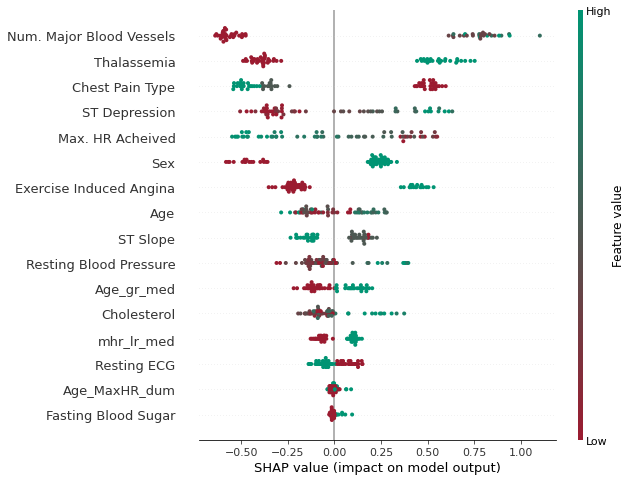

In [67]:
shap.summary_plot(shap_values, X_test,cmap=cmap)

You can also view feature importances explicity

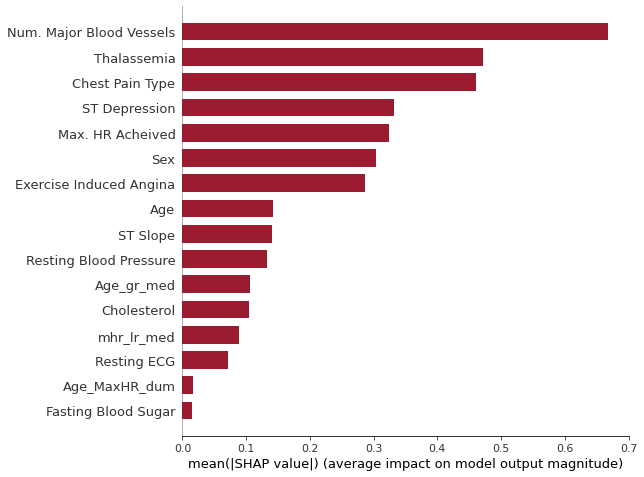

In [68]:
shap.summary_plot(shap_values, X_train, plot_type="bar",color=yes_c)

We can also view the interaction between features. 

In this case, I will use Max. HR Acheived and Age, as these are features that appear to be related.

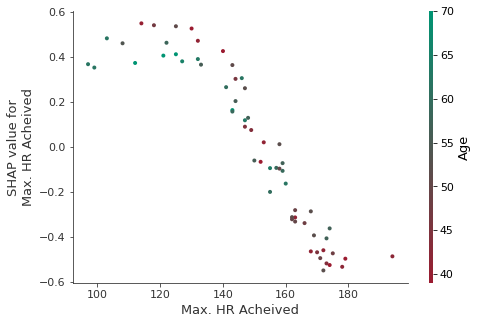

In [69]:
shap.dependence_plot('Max. HR Acheived', shap_values, X_test, interaction_index="Age",cmap=cmap)

We see that the lower the Max HR Acheived, the higher the SHAP value and therefore more likely it is that a patient will suffer heart disease.

Additionally, the colours indicate age range. We can see that a higher Max HR is often acheived by lower age groups - which makes sense.